In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
import matplotlib.pyplot as plt

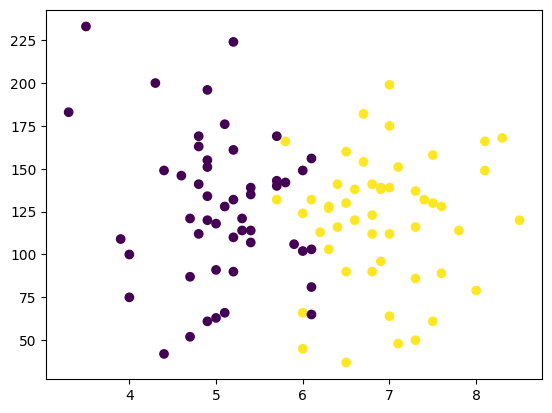

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

it can be classified by logistic regression

# 1. Extract input and output cols

In [ ]:
x=df.iloc[:,0:2]
y= df.iloc[:,-1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


# 3. Train test **split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
27,6.0,124.0
72,7.3,116.0
16,5.2,224.0
20,6.6,120.0
9,5.1,66.0
...,...,...
52,7.0,175.0
44,7.5,61.0
77,7.3,50.0
71,6.1,132.0


In [ ]:
y_train

,placement
27,1
72,1
16,0
20,1
9,0
...,...
52,1
44,1
77,1
71,1


# **2. Scale the values**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.05237872,  0.00602331],
       [ 1.18725107, -0.19110328],
       [-0.64600426,  2.47010567],
       [ 0.57616596, -0.09253998],
       [-0.73330213, -1.42314445],
       [ 0.57616596,  0.35099484],
       [ 0.75076171, -0.01861751],
       [ 0.48886809, -0.83176469],
       [-1.7808766 , -0.36358904],
       [-1.08249362, -1.76811598],
       [ 0.31427234, -0.51143398],
       [ 0.48886809, -2.13772834],
       [ 0.05237872, -1.42314445],
       [-1.69357873, -0.58535645],
       [ 0.66346383,  1.43519108],
       [-0.99519575,  0.42491731],
       [-0.99519575,  1.11486037],
       [ 1.27454894,  0.2031499 ],
       [ 1.18725107,  0.32635402],
       [-1.69357873, -1.20137704],
       [-0.90789788,  1.78016261],
       [-0.12221702,  0.44955814],
       [-0.8206    , -1.49706692],
       [-1.34438724, -2.01452422],
       [-0.73330213,  0.10458661],
       [-0.20951489,  0.2031499 ],
       [ 0.83805958,  0.37563567],
       [ 0.92535745,  1.85408508],
       [-2.13006809,

In [ ]:
x_test

array([[ 1.44914469,  0.10458661],
       [ 1.36184681,  0.84381131],
       [-0.47140851, -0.24038492],
       [ 1.18725107, -0.93032798],
       [ 0.40157021,  0.42491731],
       [ 0.92535745, -0.28966657],
       [-1.16979149,  0.54812143],
       [-0.20951489,  1.11486037],
       [ 0.92535745, -1.4724261 ],
       [ 0.05237872, -0.53607481]])

# 4. Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

model training

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

# 5. Evaluate the model/model selection

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_test

,placement
30,1
91,1
41,0
90,1
54,1
29,1
39,0
84,0
64,1
62,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

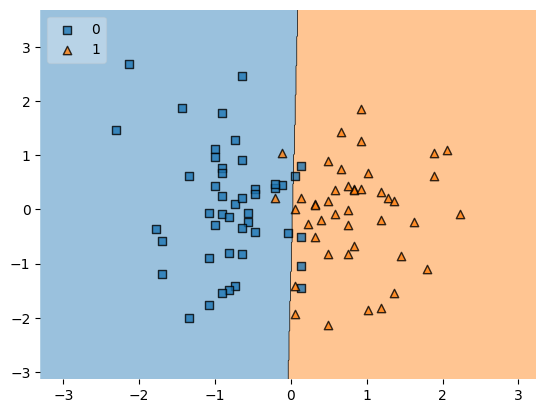

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))